In [4]:
import pandas as pd
from io import StringIO
from google.colab import drive
import string
import numpy as np


drive.mount('/content/drive')
exp_path_bal ='/content/drive/My Drive/UK/exp_indiv_pred_w_cert.csv'
#exp_path_bal = '/content/drive/My Drive/Italy/experiment/indiv_exp_results.csv'
#exp_path_bal = '/content/drive/My Drive/Spain/experiment/experiment_results.csv'
#exp_path_bal = '/content/drive/My Drive/Spain/experiment/experiment_day_results.csv'
#exp_path_bal = '/content/drive/My Drive/France/experiment/indiv_exp_results.csv'
#exp_path_bal = '/content/drive/My Drive/Germany/experiment/indiv_exp_results.csv'
df_bal = pd.read_csv(exp_path_bal, index_col=0, engine='python', error_bad_lines=False)

#for All except UK
#df_bal['prediction']=df_bal['predictions']

df_bal['Date']= pd.to_datetime(df_bal['Date'])

df_bal=df_bal.drop(columns=['CTweet'])
df_bal['dummy'] = pd.Series([1]*len(df_bal.index), index=df_bal.index)


#df_pos = pd.DataFrame({'Date': pd.to_datetime(df_bal['Date']), 'prediction':df_bal['prediction'], 'certainty':df_bal['certainty']}, index=df_bal.index)

day_bal = df_bal.groupby([pd.Grouper(key='Date', freq='D')]).sum().dropna()
day_bal

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,prediction,certainty,dummy
Date,,,
2019-12-01 00:00:00+00:00,768,4494.628201,9290
2019-12-02 00:00:00+00:00,674,3834.314656,8000
2019-12-03 00:00:00+00:00,702,4135.135802,8573
2019-12-04 00:00:00+00:00,723,4420.922488,9036
2019-12-05 00:00:00+00:00,790,4464.183272,9219
...,...,...,...
2020-05-05 00:00:00+00:00,1355,7468.940145,15711
2020-05-06 00:00:00+00:00,1243,7516.840531,15824
2020-05-07 00:00:00+00:00,1345,7566.761449,15834


In [5]:
print(day_bal.columns)
day_bal['rate'] = day_bal['prediction']/day_bal['dummy']
#day_bal['certainty_rate']=day_bal['certainty']/day_bal['dummy']

Index(['prediction', 'certainty', 'dummy'], dtype='object')


# Visuals

2020-05-09 00:00:00+00:00


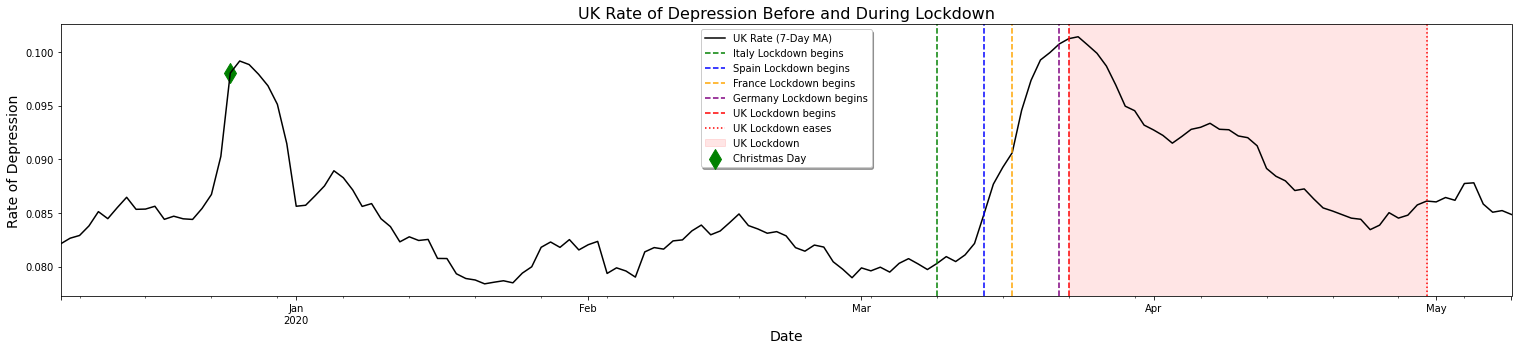

In [6]:
import matplotlib.pyplot as plt
from datetime import date

#day_bal['rate'].plot(figsize=[26,5], color=['black'], label='France Rate')
day_bal['smoothed'] = day_bal['rate'].rolling(7).mean()
day_bal['smoothed'].dropna().plot(figsize=[26,5], color=['black'], label='UK Rate (7-Day MA)')
plt.scatter(x=date(2019, 12, 25), y=day_bal['smoothed'][date(2019, 12, 25)], marker='d', label='Christmas Day', s=200, color='green')
plt.axvline(x=date(2020, 3, 9), linestyle='--', color='green', label='Italy Lockdown begins')
plt.axvline(x=date(2020, 3, 14), linestyle='--', color='blue', label='Spain Lockdown begins')
plt.axvline(x=date(2020, 3, 17), linestyle='--', color='orange', label='France Lockdown begins')
plt.axvline(x=date(2020, 3, 22), linestyle='--', color='purple', label='Germany Lockdown begins')
plt.axvline(x=date(2020, 3, 23), linestyle='--', color='red', label='UK Lockdown begins')

plt.axvspan(date(2020, 3, 23), date(2020,4,30), alpha=0.1, color='red', label='UK Lockdown')

plt.axvline(x=date(2020, 4, 30), linestyle=':', color='red', label='UK Lockdown eases')
#plt.axvline(x=date(2020, 4, 28), linestyle=':', color='blue', label='Spain Lockdown eases')
#plt.axvline(x=date(2020, 4, 27), linestyle=':', color='green', label='Italy Lockdown eases')
#plt.axvline(x=date(2020, 5, 11), linestyle=':', color='orange', label='France Lockdown eases')
#plt.axvline(x=date(2020, 5, 6), linestyle=':', color='purple', label='Germany Lockdown eases')
#plt.fill_between(x=exp_pos_sum.index,y1=0,y2=exp_pos_sum['True_TP'], color='green', alpha=0.2, label='TP Zone')
#plt.fill_between(x=exp_pos_sum.index, y1=exp_pos_sum['True_TP'], y2=day_bal['rate'], color='red', alpha=0.2, label='FP Zone')
#plt.fill_between(x=day_bal['smoothed'].index,y1=max(day_bal['smoothed']), y2=min(day_bal['smoothed']), where= <=x, color='red', alpha=0.2, label='UK Lockdown')


#plt.scatter(x=date(2020, 1, 6), y=day_bal['smoothed'][date(2020, 1, 6)], marker='d', label='Spanish Xmas', s=200, color='red')
plt.title(label='UK Rate of Depression Before and During Lockdown', fontdict={'fontsize':16, 'fontweight':100})
plt.xlabel(xlabel='Date', fontdict={'fontsize':14})
plt.ylabel(ylabel='Rate of Depression', fontdict={'fontsize':14})
plt.legend(loc='upper center', shadow=True)
print(day_bal.index[-1])

plt.savefig('/content/drive/My Drive/UK/experiment/UK_smooth_region.png')